<a href="https://colab.research.google.com/github/Arfanbashashaik/DAA-Hands-On-2/blob/main/benchmarkk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-e1ed363659db>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 10000 + 1) instead
  array=np.random.random_integers(0,10000,size)


CPU:1physical cores,2logical cores
Memory:svmem(total=13609431040, available=12152193024, percent=10.7, used=1121943552, free=7379881984, active=697892864, inactive=5203435520, buffers=394522624, cached=4713082880, shared=2072576, slab=224133120)


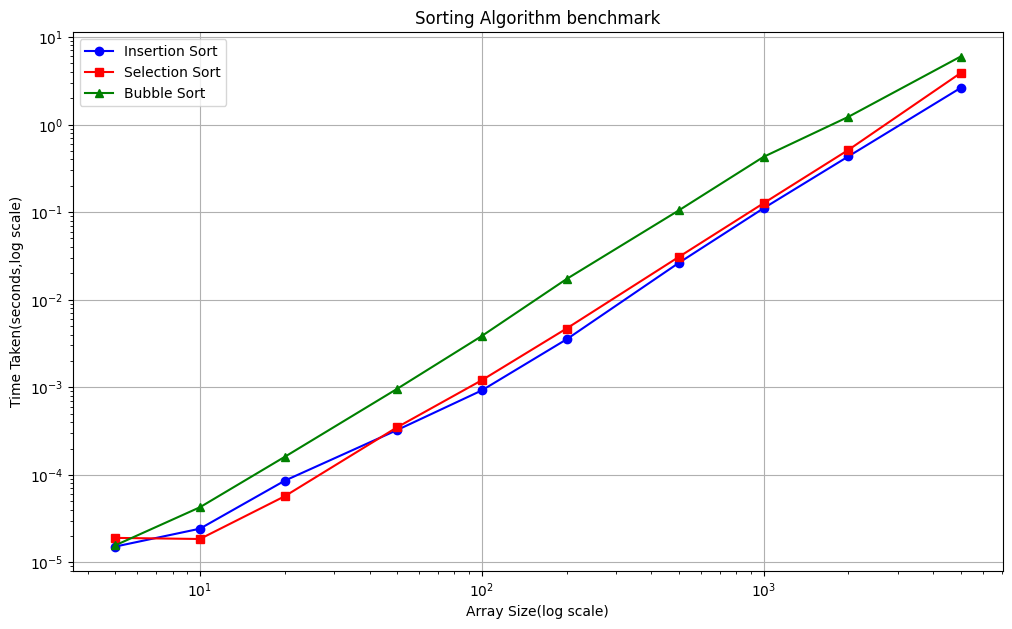

In [5]:
#Selection sort algorithm
def selection_sort(arr):
  k=len(arr)
  for i in range(k):
    min_index=i #Here i intialize the minimum element index
#lets see for the minimum element in the remaining unsorted array
    for j in range(i+1,k):
      if arr[j]<arr[min_index]:
        min_index=j
#swapping will be takes place with the first element of the unsorted array if it finds the minimum element
    arr[i],arr[min_index]=arr[min_index],arr[i]

#Bubble sort algorithm

def bubble_sort(arr):
  k=len(arr)
  for i in range(k):
    swapped=False
    for j in range(k-i-1):
      if arr[j]>arr[j+1]:
# swapping will done if the elements are in wrong order
        arr[j],arr[j+1]=arr[j+1],arr[j]
        swapped=True
#If there is no elements to swap then the array is sorted
    if not swapped:
        break

# Insertion sort algorithm
def insertion_sort(arr):
  for i in range(1,len(arr)):
    current_value = arr[i]
    position=i
#if the elements are greater than the present element then shift the elements
    while position>0 and arr[position-1]>current_value:
      arr[position]=arr[position-1]
      position-=1
# It is to insert the fine element into the correct place
    arr[position]=current_value

import timeit #it is imported to measure the execution time of the code
import matplotlib.pyplot as plt #used this to plot the graphs
import numpy as np #as we know it is for numerical operations
import psutil #This is used to get system information

#functions to benchmark sorting algortithm
def benchmark_sorting_algorithm(sort_function,sizes):
  results=[]
  for size in sizes:
#generating an random array for the given sizes
    array=np.random.random_integers(0,10000,size)
    array_copy=np.copy(array) #make a copy of an array to get relief from the sorting issues
#This is to measure the time taken to sort an array
    start_time=timeit.default_timer()
    sort_function(array_copy)
    end_time=timeit.default_timer()
    duration=end_time-start_time  #this is to calculate the duration
    results.append(duration)
  return results

# functions made to define the system specs,prints the cpu memory specs of the system

def print_system_specs():
  cpu_details=f"CPU:{psutil.cpu_count(logical=False)}physical cores,{psutil.cpu_count(logical=True)}logical cores"
  memory_details=f"Memory:{psutil.virtual_memory()}"
  print(cpu_details)
  print(memory_details)

#functions made to plot the benchmark results

def plot_benchmark_results(sizes,insertion_times,selection_times,bubble_times):
  plt.figure(figsize=(12,7))
  plt.plot(sizes,insertion_times,label='Insertion Sort',marker='o',linestyle='-',color='b')
  plt.plot(sizes,selection_times,label='Selection Sort',marker='s',linestyle='-',color='r')
  plt.plot(sizes,bubble_times,label='Bubble Sort',marker='^',linestyle='-',color='g')
  plt.xscale('log') #This is for logarithimic scale for the x axis which represents the array sizes
  plt.yscale('log') #This is for logarithimic scale for the y axis which represents the time taken
  plt.xlabel('Array Size(log scale)')
  plt.ylabel('Time Taken(seconds,log scale)')
  plt.title('Sorting Algorithm benchmark')
  plt.legend()
  plt.grid(True)
  plt.show()

#This is to define the different array sizes to the benchmark
array_sizes=[5,10,20,50,100,200,500,1000,2000,5000]

#benchmark for the 3 algorithms
insertion_sort_times=benchmark_sorting_algorithm(insertion_sort,array_sizes)
selection_sort_times=benchmark_sorting_algorithm(selection_sort,array_sizes)
bubble_sort_times=benchmark_sorting_algorithm(bubble_sort,array_sizes)

#This statement is to print the system specs
print_system_specs()

#Used this to plot the benchmark results
plot_benchmark_results(array_sizes,insertion_sort_times,selection_sort_times,bubble_sort_times)





